### Análise Exploratória do Titanic

1 - Quantas pessoas sobreviveram ao desastre, segundo este dataset? Quantas não sobreviveram? (Avalie em relação ao sexo, à quantidade de filhos, à idade, à classe, etc...)
    
2 - Qual foi a proporção de homens e mulheres que sobreviveram a tragédia?
    
3 - Será que o número de sobreviventes meninas foi muito maior que os sobreviventes meninos?
    
4 - Quem são os passageiros que não tiveram sua tarifa cobrada? Eles sobreviveram?

** 5 - Será que o fato de o passageiro ter mais filhos garantiu a sua sobrevivência?**

** 6 - A classe em que o passageiro encontrava-se foi um fator decisivo para a sobrevivência?**

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
titanic=pd.read_csv('titanic.csv')

In [3]:
titanic.columns = ['ID_Passageiro', 'Sobreviveu?', 'Classe', 'Nome', 'Sexo', 'Idade', 'Filhos',
       'Pais', 'Ticket', 'Valor Pago', 'Cabine', 'Embarcado em']

titanic['Sexo'].replace('female','feminino',inplace=True)
titanic['Sexo'].replace('male','masculino',inplace=True)

In [4]:
title = titanic['Nome'].str.split(',')

title = [title[1].strip().split('.')[0] for title in
                        titanic['Nome'].str.split(',')]

titanic['Titulo']=title
titanic['Titulo'].head(1)



0    Mr
Name: Titulo, dtype: object

In [5]:
#Media da idade por titulo
AgebyTitle = titanic['Idade'].groupby(titanic['Titulo']).mean().reset_index()


In [6]:
#inclui coluna de idade por titulo
titanic = pd.merge(titanic,AgebyTitle,on='Titulo')
#titanic

In [7]:
#Substituir idades faltantes
titanic['Idade_x'].fillna(titanic['Idade_y'],inplace=True)
titanic.head(1)

,ID_Passageiro,Sobreviveu?,Classe,Nome,Sexo,Idade_x,Filhos,Pais,Ticket,Valor Pago,Cabine,Embarcado em,Titulo,Idade_y
0,1,0,3,"Braund, Mr. Owen Harris",masculino,22.0,1,0,A/5 21171,7.25,NaN,S,Mr,32.36809


(array([ 58.,  46., 213., 169., 254.,  71.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

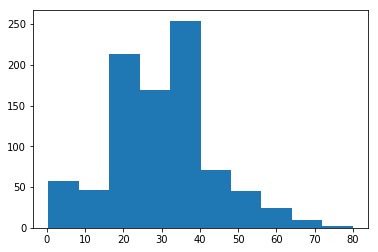

In [8]:
idades = titanic['Idade_x']
plt.hist(titanic['Idade_x'],bins=10)

In [9]:
passageiros_por_idade = titanic[(titanic['Idade_x']>=35) & (titanic['Idade_x']<=40)]
passageiros_por_idade['Sexo'].value_counts()

masculino    52
feminino     50
Name: Sexo, dtype: int64

In [10]:
mulheres_por_idade = passageiros_por_idade[passageiros_por_idade['Sexo']=='feminino']


In [11]:
por_idade_por_sexo = passageiros_por_idade['ID_Passageiro'].groupby(passageiros_por_idade['Sexo']).count()
por_idade_por_sexo

Sexo
feminino     50
masculino    52
Name: ID_Passageiro, dtype: int64

In [20]:
#titanic.drop(columns=['Idade_y'],inplace=True)

titanic.drop(['Cabine'],axis=1,inplace=True)
titanic.columns

Index(['ID_Passageiro', 'Sobreviveu?', 'Classe', 'Nome', 'Sexo', 'Idade_x',
       'Filhos', 'Pais', 'Ticket', 'Valor Pago', 'Embarcado em', 'Titulo'],
      dtype='object')

In [ ]:
#passageiros a bordo
passageiros_a_bordo=titanic['ID_Passageiro'].groupby(titanic['Sexo']).count()
passageiros_a_bordo

In [ ]:
#sobreviventes
sobreviventes = titanic[titanic['Sobreviveu?']==1]

In [ ]:
#faixa etária dos sobreviventes
plt.hist(sobreviventes['Idade_x'],bins=10)

## Contagem de sobreviventes

sobreviventesporCRITERIO = sobreviventes['ID_Passageiro'].groupby(sobreviventes['CRITERIO']).count()

In [ ]:
sobreviventesporclasse = sobreviventes['ID_Passageiro'].groupby(sobreviventes['Classe']).count()
sobreviventesporclasse

In [ ]:
passageirosporclasse = titanic['ID_Passageiro'].groupby(titanic['Classe']).count()
passageirosporclasse

In [ ]:
proporcao_por_classe=sobreviventesporclasse/passageirosporclasse
proporcao_por_classe

In [ ]:
#análise de prioridade
# mulheres e crianças primeiro

In [10]:
prioritarios = (titanic['Idade_x'] <=15) & (titanic['Idade_x']>0) | (titanic['Sexo']=='feminino')
prioritarios=titanic[prioritarios]
prioritarios.shape

(358, 14)

In [11]:
#dos prioritarios, quantos sao criancas por sexo

prioritarioscriancas = prioritarios[(prioritarios['Idade_x']<=15)& (prioritarios['Idade_x']>0)]
prioritarioscriancas = prioritarioscriancas['ID_Passageiro'].groupby(prioritarioscriancas['Sexo']).count()
prioritarioscriancas

Sexo
feminino     43
masculino    44
Name: ID_Passageiro, dtype: int64

In [12]:
prioritariosmulheres = prioritarios[(prioritarios['Sexo']=='feminino') & (prioritarios['Idade_x']>15)]
mulheres_priori_sobrevive=prioritariosmulheres['ID_Passageiro'].groupby(prioritariosmulheres['Sobreviveu?']).count()
mulheres_priori_sobrevive

Sobreviveu?
0     66
1    205
Name: ID_Passageiro, dtype: int64

In [14]:
criancas = (titanic['Idade_x'] <= 15) & (titanic['Idade_x'] >0)
criancas = titanic[criancas]
criancas['ID_Passageiro'].count()

87

In [15]:
criancasporsexo = criancas['ID_Passageiro'].groupby(criancas['Sexo']).count()
criancasporsexo

Sexo
feminino     43
masculino    44
Name: ID_Passageiro, dtype: int64

In [16]:
criancassobreviventes=criancas[criancas['Sobreviveu?']==1]['ID_Passageiro'].count()
#criancassobreviventesporsexo
sobrevivencia_criancas = criancas['ID_Passageiro'].groupby([criancas['Sexo'],criancas['Sobreviveu?']]).count()
sobrevivencia_criancas

Sexo       Sobreviveu?
feminino   0              15
           1              28
masculino  0              21
           1              23
Name: ID_Passageiro, dtype: int64

In [ ]:
porfilhos = titanic['ID_Passageiro'].groupby(titanic['Filhos']).count()
porfilhos

In [ ]:
sobreviventesporfilhos = sobreviventes['ID_Passageiro'].groupby(sobreviventes['Filhos']).count()
sobreviventesporfilhos

In [ ]:
sobreviventesporsexo = sobreviventes['ID_Passageiro'].groupby(sobreviventes['Sexo']).count()
sobreviventesporsexo

In [ ]:
sobreviventesporsexo2 = titanic['ID_Passageiro'].groupby([titanic['Filhos'],titanic['Sobreviveu?']]).count()
sobreviventesporsexo2

In [ ]:
titanic.drop(columns=['Ticket','Cabine'])

In [ ]:
titanic.drop(['Cabine','Ticket'],axis=1)

In [ ]:
porsexo_porclasse = titanic['ID_Passageiro'].groupby([titanic['Sexo'],titanic['Classe']]).count()
porsexo_porclasse

In [ ]:
sobreviventes = titanic[titanic['Sobreviveu?']==1]
sobreviventes_porsexo = sobreviventes['ID_Passageiro'].groupby(sobreviventes['Sexo']).count()
titanic_porsexo = titanic['ID_Passageiro'].groupby(titanic['Sexo']).count()